In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sbn
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import h5py

Using TensorFlow backend.


## Show two sample images

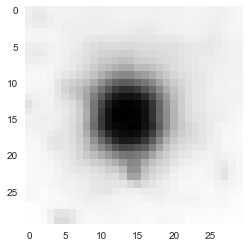

In [2]:
x_0 = cv2.imread('augmented_images_of_stars/object_1.jpg',0)
#x_0 = cv2.cvtColor(x_0, cv2.COLOR_BGR2GRAY)
plt.grid(False)
plt.imshow(x_0)
plt.show()

In [3]:
x_0.shape

(30, 30)

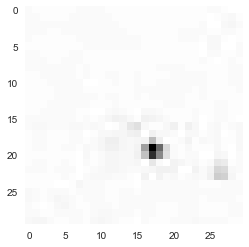

In [4]:
x_0 = cv2.imread('augmented_images_of_empty_space/object_1.jpg',0)
#x_0 = cv2.cvtColor(x_0, cv2.COLOR_BGR2GRAY)
plt.grid(False)
plt.imshow(x_0)
plt.show()

In [5]:
x_0.shape

(30, 30)

## Load images

In [6]:
x = []
y = []

for j in range(1,1013):
    image_filename = 'augmented_images_of_stars/object_%d.jpg'%j
    image = cv2.imread(image_filename,0)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.resize(image, (40, 40))
    x.append(image)
    y.append(1)

In [7]:
for j in range(1,1013):
    image_filename = 'augmented_images_of_empty_space/object_%d.jpg'%j
    image = cv2.imread(image_filename,0)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.resize(image, (40, 40))
    x.append(image)
    y.append(0)

## Convert lists to arrays

In [8]:
x = np.array(x)
y = np.array(y)
#x,y = shuffle(x,y)

In [9]:
x.shape

(2024, 30, 30)

## Split the data into train and test sets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1,stratify=y)

## Reshape the data for the deep learning model

In [11]:
num_classes = 2
img_rows, img_cols = 30, 30
input_shape = (img_rows, img_cols, 1)

In [12]:
x_train.shape[0]

1821

In [13]:
x_test.shape[0]

203

In [14]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_train /= 255
#x_test /= 255

## Build the deep learning model (CNN)

In [15]:
model = Sequential()
model.add(Conv2D(filters = 20, kernel_size=(3, 3), activation='relu',input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Train the model

In [17]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10,validation_split=0.10)

Train on 1638 samples, validate on 183 samples
Epoch 1/10
1638/1638 [==============================] - 1s - loss: 1.7954 - acc: 0.7277 - val_loss: 2.0459 - val_acc: 0.7541
Epoch 2/10
1638/1638 [==============================] - 0s - loss: 1.0397 - acc: 0.8858 - val_loss: 0.7608 - val_acc: 0.8907
Epoch 3/10
1638/1638 [==============================] - 0s - loss: 0.3834 - acc: 0.9365 - val_loss: 0.6986 - val_acc: 0.9016
Epoch 4/10
1638/1638 [==============================] - 0s - loss: 0.1842 - acc: 0.9615 - val_loss: 0.2453 - val_acc: 0.9454
Epoch 5/10
1638/1638 [==============================] - 0s - loss: 0.0938 - acc: 0.9805 - val_loss: 0.1128 - val_acc: 0.9563
Epoch 6/10
1638/1638 [==============================] - 0s - loss: 0.1213 - acc: 0.9725 - val_loss: 0.2032 - val_acc: 0.9617
Epoch 7/10
1638/1638 [==============================] - 0s - loss: 0.1303 - acc: 0.9744 - val_loss: 0.0634 - val_acc: 0.9781
Epoch 8/10
1638/1638 [==============================] - 0s - loss: 0.0326 - ac

In [18]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

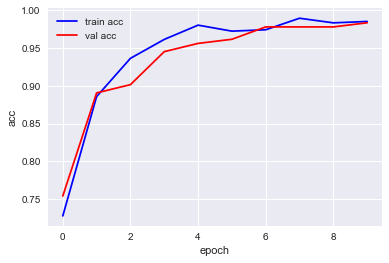

In [19]:
plt.plot(history.epoch,history.history['acc'],c='b',label='train acc')
plt.plot(history.epoch,history.history['val_acc'],c='r',label='val acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Make predictions

In [20]:
y_pred = model.predict_classes(x_test)[:,0]#np.round(model.predict(x_test))[:,0]

 32/203 [===>..........................] - ETA: 0s

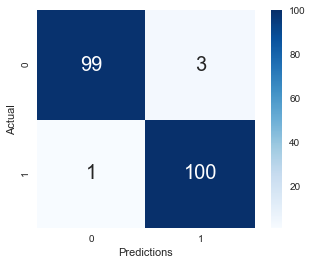

In [21]:
table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})

plt.show()

## Evaluate the model

In [22]:
model.evaluate(x_test, y_test, verbose=0) # [loss, accuracy]

[0.031435597181008218, 0.98029556797055772]

## Save and load the model

In [23]:
model.save('DL_model.h5')

In [24]:
model2 = load_model('DL_model.h5')

In [25]:
model2.predict(x_test)[0:10,0] # probability to belong to the class 1

array([  4.02280502e-03,   2.93789835e-05,   1.90490866e-07,
         1.00000000e+00,   9.99996185e-01,   1.00000000e+00,
         1.56649072e-02,   2.81790705e-07,   9.99984622e-01,
         2.72726058e-04], dtype=float32)

In [26]:
model2.predict_classes(x_test)[0:10,0] # classes

 32/203 [===>..........................] - ETA: 0s

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [27]:
y_test[0:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])